In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image

    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

In [11]:
meanZ = np.load('/home/zilong/Desktop/2D2P/Data/184_02082023/DP/meanstacks.npy')

meanZ_HM = np.zeros_like(meanZ)
temp = meanZ[0,:,:]
for i in range(meanZ.shape[0]):
    Zi = meanZ[i,:,:]
    #histmatch(Zi, temp)
    Zi = hist_match(Zi, temp)
    meanZ_HM[i,:,:] = Zi
meanZ_HM = meanZ_HM.astype(np.int16)    
np.save('/home/zilong/Desktop/2D2P/Data/184_02082023/DP/meanstacks_HM.npy', meanZ_HM)

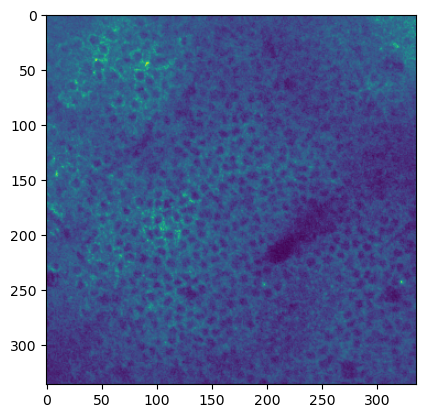

In [15]:
plt.imshow(meanZ_HM[35].T)